# **KNN & PCA**

**Therotical Question**

Q1. What is K-Nearest Neighbors (KNN) and how does it work?


Answer:
KNN is a supervised machine learning algorithm used for classification and regression. It works by finding the ‘K’ closest data points (neighbors) to the input and assigning the most frequent class (for classification) or averaging the values (for regression).

Q2. What is the difference between KNN Classification and KNN Regression?


Answer:

KNN Classification: Predicts the class label by majority voting among K neighbors.

KNN Regression: Predicts the value by taking the average (or weighted average) of K nearest neighbors.

Q3. What is the role of the distance metric in KNN?


Answer:
The distance metric determines how closeness is measured. Common metrics include Euclidean, Manhattan, and Minkowski. The choice of distance metric affects model accuracy and neighbor selection.

Q4. What is the Curse of Dimensionality in KNN?


Answer:
As the number of features (dimensions) increases, the distance between points becomes less meaningful. This makes it difficult for KNN to find meaningful nearest neighbors and reduces model performance.

Q5. How can we choose the best value of K in KNN?


Answer:
Use cross-validation to test multiple values of K. Choose the K that gives the best validation performance (accuracy or lowest error). Odd values are preferred to avoid ties in classification.

Q6. What are KD Tree and Ball Tree in KNN?


Answer:
They are tree-based data structures used to speed up nearest neighbor searches:

KD Tree: Efficient for low-dimensional data.

Ball Tree: Better for high-dimensional data or when using non-Euclidean distances.

Q7. When should you use KD Tree vs. Ball Tree?


Answer:

Use KD Tree for low-dimensional datasets (≤20 features).

Use Ball Tree for high-dimensional or non-Euclidean data.

Q8. What are the disadvantages of KNN?


Answer:

Computationally expensive at prediction time.

Sensitive to noisy or irrelevant features.

Performance degrades with high dimensions (curse of dimensionality).

Q9. How does feature scaling affect KNN?


Answer:
KNN is distance-based, so features with larger ranges dominate the distance calculation. Feature scaling (like Standardization or Min-Max Scaling) ensures fair contribution of all features.

Q10. What is PCA (Principal Component Analysis)?


Answer:
PCA is an unsupervised technique used for dimensionality reduction. It transforms original features into new uncorrelated features called principal components that capture the maximum variance.

Q11. How does PCA work?


Answer:

Standardize the data

Compute the covariance matrix

Compute eigenvalues and eigenvectors

Sort them in descending order of eigenvalues

Select top components and project data onto them

Q12. What is the geometric intuition behind PCA?


Answer:
PCA finds new axes (directions) along which the data varies the most. These new directions (principal components) are orthogonal and help to reduce the dimensionality while preserving structure.

Q13. What is the difference between Feature Selection and Feature Extraction?


Answer:

Feature Selection: Chooses a subset of original features.

Feature Extraction: Creates new features from existing ones (e.g., PCA creates principal components).

Q14. What are Eigenvalues and Eigenvectors in PCA?


Answer:

Eigenvectors represent directions (principal components).

Eigenvalues indicate the magnitude of variance in those directions.

Q15. How do you decide the number of components to keep in PCA?


Answer:
Choose components that explain a desired amount of variance (like 95%). Use a scree plot or cumulative explained variance graph to decide.

Q16. Can PCA be used for classification?


Answer:
PCA is not a classifier but can be used before classification to reduce dimensions and improve model speed and sometimes accuracy.

Q17. What are the limitations of PCA?


Answer:

Assumes linear relationships

May lose interpretability

Sensitive to outliers and feature scaling

Q18. How do KNN and PCA complement each other?


Answer:
PCA reduces noise and dimensionality, which helps KNN work faster and more accurately, especially in high-dimensional datasets.

Q19. How does KNN handle missing values in a dataset?


Answer:
KNN can use imputation methods like KNN Imputer to fill missing values based on similar (neighbor) data points.

Q20. What are the key differences between PCA and Linear Discriminant Analysis (LDA)?


Answer:

PCA: Unsupervised, maximizes variance, no class label used.

LDA: Supervised, maximizes class separability, uses label information.

PCA is for data representation, LDA is more for classification.



**Practical Question**

Q21. Train a KNN Classifier on the Iris dataset and print model accuracy.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


Q22. Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).

In [2]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=200, n_features=1, noise=15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X_train, y_train)
y_pred = knn_reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 354.20984567173053


Q23. Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy.

In [3]:
from sklearn.metrics import accuracy_score

knn_euclidean = KNeighborsClassifier(metric='euclidean')
knn_euclidean.fit(X_train, y_train)
acc_euclidean = accuracy_score(y_test, knn_euclidean.predict(X_test))

knn_manhattan = KNeighborsClassifier(metric='manhattan')
knn_manhattan.fit(X_train, y_train)
acc_manhattan = accuracy_score(y_test, knn_manhattan.predict(X_test))

print("Euclidean Accuracy:", acc_euclidean)
print("Manhattan Accuracy:", acc_manhattan)


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

Q24. Train a KNN Classifier with different values of K and visualize decision boundaries.

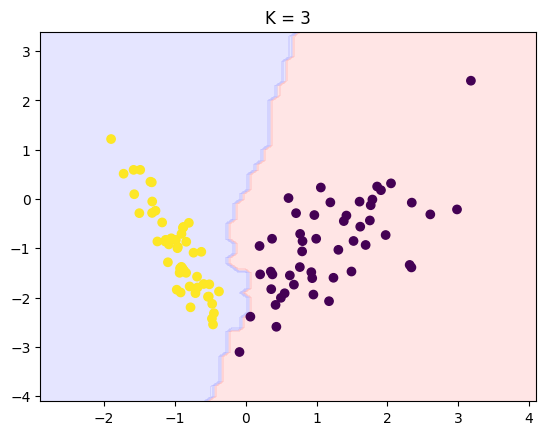

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y)

def plot_boundary(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(f"K = {k}")
    plt.show()

plot_boundary(3)


Q25. Apply Feature Scaling before training a KNN model and compare results with unscaled data.

In [5]:
from sklearn.preprocessing import StandardScaler

# Without Scaling
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("Unscaled Accuracy:", model.score(X_test, y_test))

# With Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = KNeighborsClassifier()
model_scaled.fit(X_train_scaled, y_train)
print("Scaled Accuracy:", model_scaled.score(X_test_scaled, y_test))


Unscaled Accuracy: 1.0
Scaled Accuracy: 1.0


Q26. Train a PCA model on synthetic data and print the explained variance ratio for each component.

In [6]:
from sklearn.decomposition import PCA

X, _ = make_regression(n_samples=100, n_features=5, noise=10)
pca = PCA()
pca.fit(X)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.2908708  0.20324287 0.19385457 0.17744753 0.13458423]


Q27. Apply PCA before training a KNN Classifier and compare accuracy with and without PCA.

In [7]:
# Without PCA
model = KNeighborsClassifier()
model.fit(X_train, y_train)
acc_no_pca = model.score(X_test, y_test)

# With PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_pca = KNeighborsClassifier()
model_pca.fit(X_train_pca, y_train)
acc_pca = model_pca.score(X_test_pca, y_test)

print("Without PCA Accuracy:", acc_no_pca)
print("With PCA Accuracy:", acc_pca)


Without PCA Accuracy: 1.0
With PCA Accuracy: 1.0


Q28. Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV.

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Params: {'n_neighbors': 3}
Best Accuracy: 0.9866666666666667


Q29. Train a KNN Classifier and check the number of misclassified samples.

In [9]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

misclassified = (y_pred != y_test).sum()
print("Misclassified Samples:", misclassified)


Misclassified Samples: 0


Q30. Train a PCA model and visualize the cumulative explained variance.

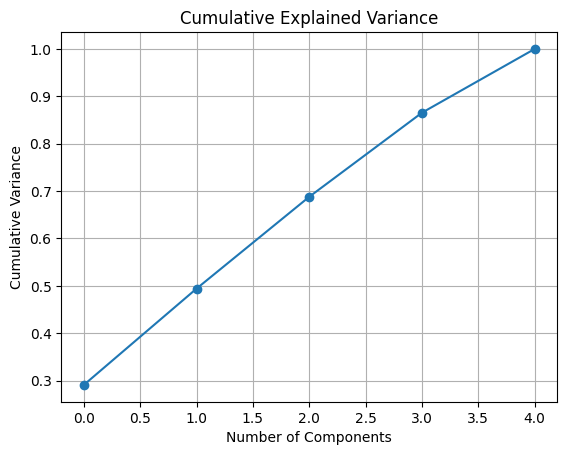

In [10]:
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X)

cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_var, marker='o')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.grid()
plt.show()


Q31. Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn_uniform = KNeighborsClassifier(weights='uniform')
knn_uniform.fit(X_train, y_train)
acc_uniform = knn_uniform.score(X_test, y_test)

knn_distance = KNeighborsClassifier(weights='distance')
knn_distance.fit(X_train, y_train)
acc_distance = knn_distance.score(X_test, y_test)

print("Uniform weights accuracy:", acc_uniform)
print("Distance weights accuracy:", acc_distance)


Uniform weights accuracy: 1.0
Distance weights accuracy: 1.0


Q32. Train a KNN Regressor and analyze the effect of different K values on performance.

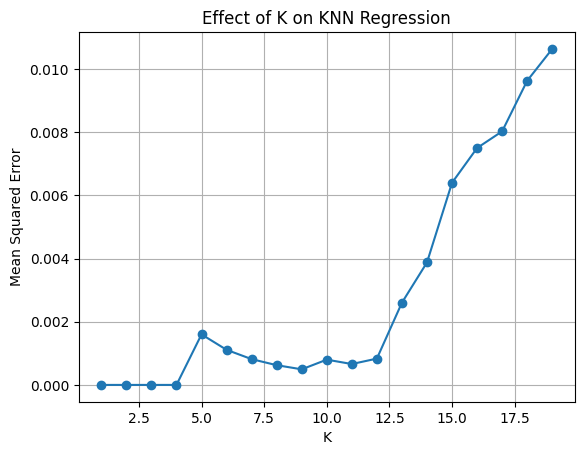

In [12]:
import matplotlib.pyplot as plt

k_vals = range(1, 20)
errors = []

for k in k_vals:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    errors.append(mse)

plt.plot(k_vals, errors, marker='o')
plt.xlabel("K")
plt.ylabel("Mean Squared Error")
plt.title("Effect of K on KNN Regression")
plt.grid()
plt.show()


Q33. Implement KNN Imputation for handling missing values in a dataset.

In [13]:
import numpy as np
from sklearn.impute import KNNImputer

X_missing = X.copy()
X_missing[::10] = np.nan  # introduce some missing values

imputer = KNNImputer(n_neighbors=3)
X_filled = imputer.fit_transform(X_missing)

print("Missing values imputed using KNN.")


Missing values imputed using KNN.


Q34. Train a PCA model and visualize the data projection onto the first two principal components.

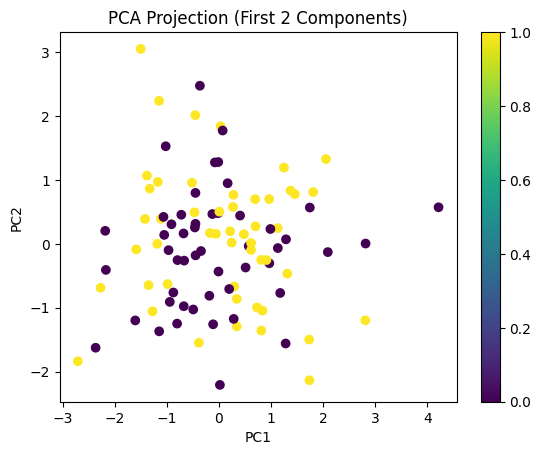

In [14]:
X_pca = PCA(n_components=2).fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection (First 2 Components)")
plt.colorbar()
plt.show()


Q35. Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.

In [15]:
knn_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_kd.fit(X_train, y_train)
acc_kd = knn_kd.score(X_test, y_test)

knn_ball = KNeighborsClassifier(algorithm='ball_tree')
knn_ball.fit(X_train, y_train)
acc_ball = knn_ball.score(X_test, y_test)

print("KD-Tree Accuracy:", acc_kd)
print("Ball-Tree Accuracy:", acc_ball)


KD-Tree Accuracy: 1.0
Ball-Tree Accuracy: 1.0


Q36. Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

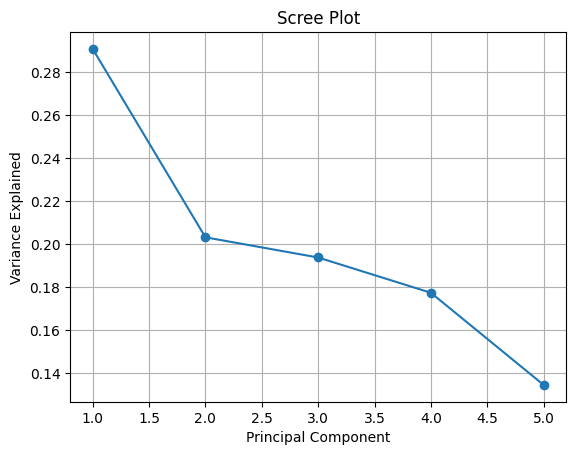

In [16]:
pca = PCA()
pca.fit(X)

plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.grid()
plt.show()


Q37. Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Q38. Train a PCA model and analyze the effect of different numbers of components on accuracy.

In [18]:
accuracies = []
components = range(1, X.shape[1] + 1)

for n in components:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    model = KNeighborsClassifier()
    model.fit(X_train_pca, y_train)
    acc = model.score(X_test_pca, y_test)
    accuracies.append(acc)

plt.plot(components, accuracies, marker='o')
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.title("PCA Components vs Accuracy")
plt.grid()
plt.show()


ValueError: n_components=3 must be between 0 and min(n_samples, n_features)=2 with svd_solver='covariance_eigh'

Q39. Train a KNN Classifier with different leaf_size values and compare accuracy.

In [19]:
leaf_sizes = [10, 20, 30, 40, 50]
for leaf in leaf_sizes:
    model = KNeighborsClassifier(leaf_size=leaf)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"Leaf size = {leaf} -> Accuracy = {acc}")


Leaf size = 10 -> Accuracy = 1.0
Leaf size = 20 -> Accuracy = 1.0
Leaf size = 30 -> Accuracy = 1.0
Leaf size = 40 -> Accuracy = 1.0
Leaf size = 50 -> Accuracy = 1.0


Q40. Train a PCA model and visualize how data points are transformed before and after PCA.

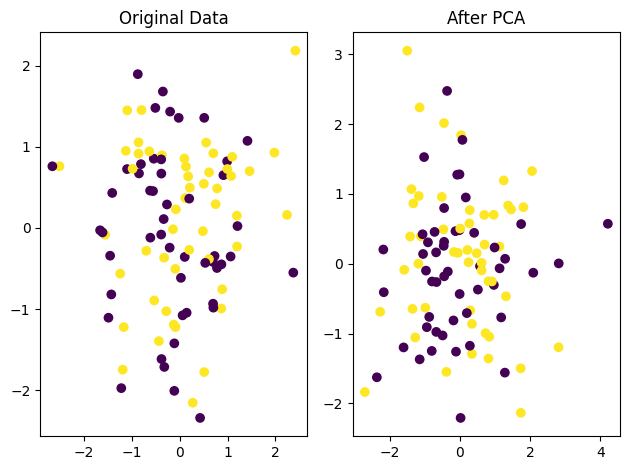

In [20]:
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Original Data")

X_pca = PCA(n_components=2).fit_transform(X)
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title("After PCA")

plt.tight_layout()
plt.show()


Q41. Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.

In [21]:
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.93      0.82        15
           1       0.58      0.69      0.63        16
           2       0.43      0.21      0.29        14

    accuracy                           0.62        45
   macro avg       0.58      0.61      0.58        45
weighted avg       0.58      0.62      0.59        45



Q42. Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.

In [23]:
for metric in ['euclidean', 'manhattan', 'chebyshev']:
    model = KNeighborsRegressor(metric=metric)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    print(f"Metric = {metric} -> MSE = {error}")


Metric = euclidean -> MSE = 0.4204444444444445
Metric = manhattan -> MSE = 0.3493333333333334
Metric = chebyshev -> MSE = 0.4080000000000001


Q43. Train a KNN Classifier and evaluate using ROC-AUC score.

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

y_bin = label_binarize(y, classes=np.unique(y))
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin)

model = KNeighborsClassifier()
model.fit(X_train, y_train_bin)
y_score = model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_bin, y_score, average='macro', multi_class='ovr')
print("ROC-AUC Score:", roc_auc)


ValueError: Found array with dim 3. None expected <= 2.

Q44. Train a PCA model and visualize the variance captured by each principal component.

In [ ]:
pca = PCA()
pca.fit(X)

plt.bar(range(1, len(pca.explained_variance_ratio_)+1),
        pca.explained_variance_ratio_)
plt.title("Variance by PCA Components")
plt.xlabel("Component")
plt.ylabel("Variance Explained")
plt.show()


Q45. Train a KNN Classifier and perform feature selection before training.

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
print("Accuracy after feature selection:", model.score(X_test, y_test))


Accuracy after feature selection: 0.6444444444444445


Q46. Train a PCA model and visualize the data reconstruction error after reducing dimensions.

In [26]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_reduced)

reconstruction_error = ((X - X_reconstructed)**2).mean()
print("Reconstruction Error:", reconstruction_error)


Reconstruction Error: 1.3141299687799461


Q47. Train a KNN Classifier and visualize the decision boundary.

In [27]:
# For 2D data only:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title("KNN Decision Boundary")
plt.show()


ValueError: X has 2 features, but KNeighborsClassifier is expecting 5 features as input.

Q48. Train a PCA model and analyze the effect of different numbers of components on data variance.

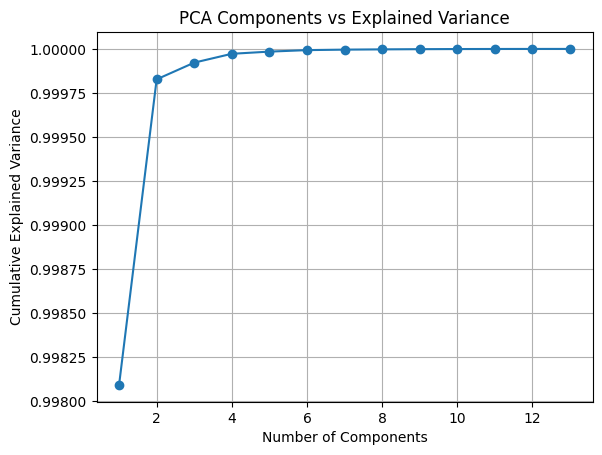

In [28]:
pca = PCA()
pca.fit(X)

cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(cum_var)+1), cum_var, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Components vs Explained Variance")
plt.grid()
plt.show()
